Model Evaluation Results:

                       R2           MSE       RMSE    CV_RMSE
Linear Regression  0.4283  5.882422e+11  766969.48  352560.96
Ridge Regression   0.8634  1.405916e+11  374955.40  369828.15
Lasso Regression   0.4648  5.506886e+11  742083.93  380227.53


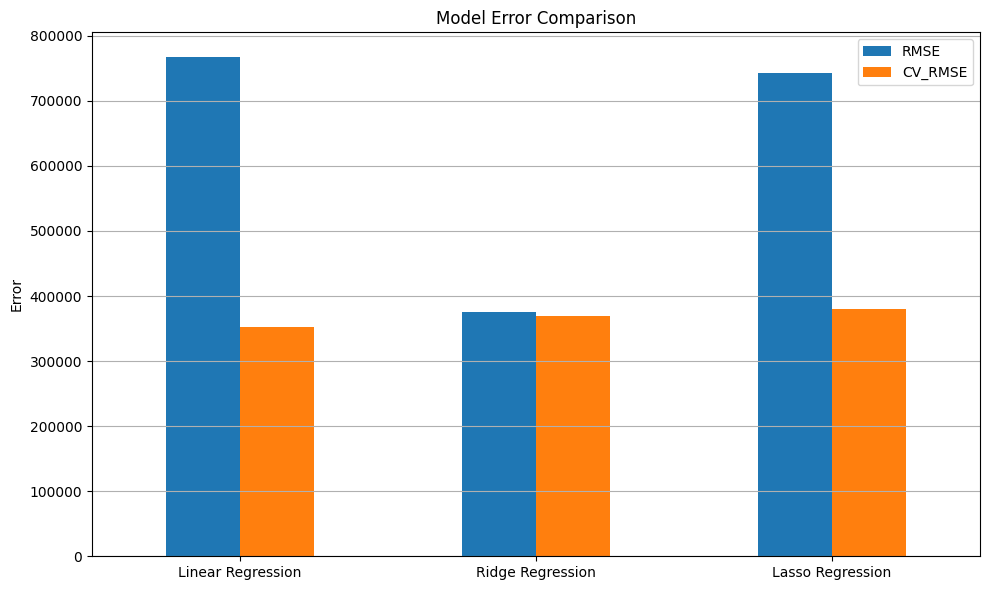

In [2]:
# I’m importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# I’m loading the housing dataset from my system
file_path = r"C:\Users\DELL\Downloads\housing_prices.csv"
df = pd.read_csv(file_path)

# I’m converting the 'City' column into numerical features using one-hot encoding
df = pd.get_dummies(df, columns=["City"], drop_first=True)

# I’m defining the feature matrix and target variable
X = df.drop("Price", axis=1)
y = df["Price"]

# I’m scaling the features to help the models (especially Lasso and Ridge) converge properly
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# I’m splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# I’m initializing the models I want to train
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1, max_iter=10000)
}

# I’m creating a dictionary to store evaluation metrics for each model
results = {}

# I’m training and evaluating each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # I’m calculating evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    # I’m performing 5-fold cross-validation and computing CV RMSE
    cv = cross_val_score(model, X_scaled, y, cv=KFold(5), scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv.mean())

    # I’m rounding values for better readability
    results[name] = {
        'R2': round(r2, 4),
        'MSE': round(mse, 2),
        'RMSE': round(rmse, 2),
        'CV_RMSE': round(cv_rmse, 2)
    }

# I’m creating a DataFrame to compare model results
results_df = pd.DataFrame(results).T
print("Model Evaluation Results:\n")
print(results_df)

# I’m visualizing the RMSE and CV_RMSE to compare model performance
results_df[['RMSE', 'CV_RMSE']].plot(kind='bar', figsize=(10, 6), title='Model Error Comparison')
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
